In [1]:
import sys
sys.path.append("c:\\users\\kusha\\appdata\\local\\programs\\python\\python37\\lib\\site-packages")
import pandas as pd
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import MaxPooling2D,ZeroPadding2D,Input, Dense, Activation, Conv2D, MaxPool2D,concatenate, AveragePooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2
from keras_preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import MultiLabelBinarizer
from keras import backend as K
from tensorflow.keras.utils import plot_model


np.random.seed(42)
tf.random.set_random_seed(42)

Using TensorFlow backend.


In [2]:
df = pd.read_csv("Training & Validation Labels.csv")
df['Extraversion'] = 'E'+ df['Extraversion'].astype(str)
df['Conscientiousness'] = 'C'+ df['Conscientiousness'].astype(str)

In [3]:
df.head()

,FileName,Extraversion,Conscientiousness
0,1,E1,C2
1,2,E1,C0
2,3,E0,C2
3,4,E0,C2
4,5,E0,C2


In [4]:
df['PL'] = df['Extraversion'].astype(str) + df["Conscientiousness"].astype("str")

In [5]:
df['PL'].value_counts()

E2C2    296
E1C1    161
E1C2    152
E2C1    126
E0C2     98
E0C1     46
E2C0     22
E1C0     16
E0C0      2
Name: PL, dtype: int64

In [6]:
df['Extraversion'].value_counts()

E2    444
E1    329
E0    146
Name: Extraversion, dtype: int64

In [7]:
df['Conscientiousness'].value_counts()

C2    546
C1    333
C0     40
Name: Conscientiousness, dtype: int64

In [8]:
data_path = './Training _ Validation Images/'
images = os.listdir(data_path)
images = {images[i].split(".")[0]:images[i] for i in range(len(images))}
images

{'1': '1.png',
 '10': '10.png',
 '100': '100.jpg',
 '101': '101.jpg',
 '102': '102.jpg',
 '103': '103.jpg',
 '104': '104.jpg',
 '105': '105.jpg',
 '106': '106.jpg',
 '107': '107.jpg',
 '108': '108.jpg',
 '109': '109.jpg',
 '11': '11.png',
 '110': '110.jpg',
 '111': '111.jpg',
 '112': '112.jpg',
 '113-A': '113-A.jpg',
 '113-B': '113-B.jpg',
 '114': '114.jpg',
 '115-A': '115-A.jpg',
 '115-B': '115-B.jpg',
 '116': '116.jpg',
 '117': '117.jpg',
 '118-A': '118-A.jpg',
 '118-B': '118-B.jpg',
 '119': '119.jpg',
 '12': '12.png',
 '120-A': '120-A.jpg',
 '120-B': '120-B.jpg',
 '121': '121.jpg',
 '122-A': '122-A.jpg',
 '122-B': '122-B.jpg',
 '123': '123.jpg',
 '124': '124.jpg',
 '125': '125.jpg',
 '126': '126.jpg',
 '127': '127.jpg',
 '128': '128.jpg',
 '129': '129.jpg',
 '13': '13.png',
 '130': '130.jpg',
 '131': '131.jpg',
 '132': '132.jpg',
 '133': '133.jpg',
 '134': '134.jpg',
 '135': '135.jpg',
 '136-A': '136-A.jpg',
 '136-B': '136-B.jpg',
 '137': '137.jpg',
 '138': '138.jpg',
 '139': '139.j

In [9]:
df = df[df['FileName '].isin(images)].sort_values(by = 'FileName ').reset_index(drop = True)

In [10]:
labels = [[df['Extraversion'][i], df['Conscientiousness'][i]] for i in range(len(df))]
labels

[['E1', 'C2'],
 ['E2', 'C2'],
 ['E2', 'C2'],
 ['E2', 'C1'],
 ['E1', 'C1'],
 ['E1', 'C0'],
 ['E1', 'C2'],
 ['E2', 'C1'],
 ['E1', 'C1'],
 ['E2', 'C1'],
 ['E2', 'C1'],
 ['E2', 'C1'],
 ['E1', 'C1'],
 ['E2', 'C2'],
 ['E0', 'C1'],
 ['E1', 'C1'],
 ['E2', 'C1'],
 ['E2', 'C1'],
 ['E2', 'C2'],
 ['E2', 'C1'],
 ['E2', 'C1'],
 ['E2', 'C1'],
 ['E1', 'C2'],
 ['E2', 'C1'],
 ['E2', 'C1'],
 ['E2', 'C1'],
 ['E0', 'C2'],
 ['E2', 'C2'],
 ['E2', 'C2'],
 ['E2', 'C1'],
 ['E2', 'C2'],
 ['E2', 'C2'],
 ['E2', 'C2'],
 ['E2', 'C1'],
 ['E0', 'C1'],
 ['E2', 'C0'],
 ['E1', 'C1'],
 ['E0', 'C0'],
 ['E1', 'C1'],
 ['E0', 'C2'],
 ['E1', 'C0'],
 ['E2', 'C0'],
 ['E0', 'C1'],
 ['E2', 'C2'],
 ['E1', 'C1'],
 ['E2', 'C1'],
 ['E1', 'C1'],
 ['E1', 'C1'],
 ['E2', 'C2'],
 ['E0', 'C1'],
 ['E1', 'C1'],
 ['E1', 'C1'],
 ['E2', 'C1'],
 ['E1', 'C2'],
 ['E2', 'C2'],
 ['E2', 'C2'],
 ['E0', 'C2'],
 ['E1', 'C2'],
 ['E1', 'C2'],
 ['E2', 'C2'],
 ['E2', 'C2'],
 ['E1', 'C2'],
 ['E1', 'C2'],
 ['E2', 'C1'],
 ['E1', 'C1'],
 ['E2', 'C2'],
 ['E0', 'C

In [11]:
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(labels)
labels

array([[0, 0, 1, 0, 1, 0],
       [0, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 1]])

In [3]:
IMAGE_DIMS = (200, 200, 3)
INIT_LR = 5e-3
EPOCHS = 15
BS = 32

In [59]:
data = []
for img in sorted(df['FileName ']):
    image = cv2.imread(data_path+images[img])
    image = cv2.resize(image, (IMAGE_DIMS[1], IMAGE_DIMS[0]))
    data.append(image)
data = np.array(data)

In [72]:
# np.save('data_'+str(IMAGE_DIMS[0]), data)

In [13]:
data = np.load('data_' + str(IMAGE_DIMS[0])+'.npy')

In [14]:
data.shape, labels.shape

((919, 200, 200, 3), (919, 6))

In [15]:
aug = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=0.2, fill_mode="nearest")

In [16]:
trainX, testX, trainY, testY = train_test_split(df['FileName '], labels, test_size=0.2, random_state=42)

In [17]:
trainY_E = pd.get_dummies(df.iloc[trainX.index]['Extraversion'])
trainY_C = pd.get_dummies(df.iloc[trainX.index]['Conscientiousness'])
testY_E = pd.get_dummies(df.iloc[testX.index]['Extraversion'])
testY_C = pd.get_dummies(df.iloc[testX.index]['Conscientiousness'])
trainX = data[trainX.index]
testX = data[testX.index]

In [18]:
trainX.shape, testX.shape

((735, 200, 200, 3), (184, 200, 200, 3))

## MODEL 1

In [4]:
inp = Input(shape = (IMAGE_DIMS[0],IMAGE_DIMS[1],3))

x = Conv2D(32, (3, 3), padding = 'same', activation='relu')(inp)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size = (2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), padding = 'same', activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size = (2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(128, (3, 3), padding = 'same', activation='relu')(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size = (2, 2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)


output1 = Dense(3, activation = 'softmax')(x)
output2 = Dense(3, activation = 'softmax')(x)


model1 = Model(inp,[output1,output2])
model1.compile(optimizer = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS),
loss = ["categorical_crossentropy","categorical_crossentropy"],metrics = ["accuracy"])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [6]:
from tensorflow.keras.utils import plot_model
plot_model(model1)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [45]:
H = model1.fit(trainX, (trainY_C, trainY_E),
              epochs=EPOCHS, batch_size=BS,
              validation_data=(testX, (testY_C, testY_E)))

Train on 735 samples, validate on 184 samples
Epoch 1/15
735/735 [==============================] - 156s 212ms/sample - loss: 633.8383 - dense_9_loss: 309.8344 - dense_10_loss: 323.1456 - dense_9_acc: 0.5320 - dense_10_acc: 0.4027 - val_loss: 2.0433 - val_dense_9_loss: 0.9611 - val_dense_10_loss: 1.0839 - val_dense_9_acc: 0.5761 - val_dense_10_acc: 0.3587
Epoch 2/15
735/735 [==============================] - 124s 169ms/sample - loss: 1.9680 - dense_9_loss: 0.8956 - dense_10_loss: 1.0723 - dense_9_acc: 0.5986 - dense_10_acc: 0.3578 - val_loss: 1.9013 - val_dense_9_loss: 0.8640 - val_dense_10_loss: 1.0338 - val_dense_9_acc: 0.5761 - val_dense_10_acc: 0.3587
Epoch 3/15
735/735 [==============================] - 101s 137ms/sample - loss: 1.8651 - dense_9_loss: 0.8276 - dense_10_loss: 1.0376 - dense_9_acc: 0.5986 - dense_10_acc: 0.3714 - val_loss: 1.8363 - val_dense_9_loss: 0.8473 - val_dense_10_loss: 0.9919 - val_dense_9_acc: 0.5761 - val_dense_10_acc: 0.5109
Epoch 4/15
735/735 [==========

In [56]:
test_img = "./Training _ Validation Images/1.png"
image = cv2.imread(test_img)
image = cv2.resize(image, (200, 200))
image = image.astype("float")
image = np.expand_dims(image, axis=0)

In [57]:
proba = model.predict(image)
proba

[array([[0.3059007 , 0.3425921 , 0.35150722]], dtype=float32),
 array([[0.3184583 , 0.32411408, 0.3574276 ]], dtype=float32)]

## MODEL 2

In [58]:
def build(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape, activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding="same", activation = 'relu'))
    model.add(Conv2D(64, (3, 3), padding="same", activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), padding="same", activation = 'relu'))
    model.add(Conv2D(128, (3, 3), padding="same", activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024, activation = 'relu'))
    model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation('sigmoid'))

    # return the constructed network architecture
    return model

In [62]:
model2 = build(width=IMAGE_DIMS[1], height=IMAGE_DIMS[0], depth=IMAGE_DIMS[2], classes=len(mlb.classes_))

In [63]:
opt = Adam(lr=INIT_LR)#, decay=INIT_LR / EPOCHS)
model2.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

In [64]:
H = model2.fit_generator(aug.flow(trainX/255, trainY, batch_size=BS),
                        validation_data=(testX/255, testY),
                        steps_per_epoch=len(trainX) // BS,
                        epochs=15, verbose=2)

Epoch 1/15
Epoch 1/15
184/22 - 3s - loss: 0.5637 - acc: 0.6685
22/22 - 43s - loss: 2.1030 - acc: 0.6543 - val_loss: 0.5699 - val_acc: 0.6685
Epoch 2/15
Epoch 1/15
184/22 - 3s - loss: 0.5533 - acc: 0.6957
22/22 - 45s - loss: 0.5677 - acc: 0.6847 - val_loss: 0.5490 - val_acc: 0.6957
Epoch 3/15
Epoch 1/15
184/22 - 3s - loss: 0.5702 - acc: 0.6920
22/22 - 40s - loss: 0.5559 - acc: 0.6965 - val_loss: 0.5576 - val_acc: 0.6920
Epoch 4/15
Epoch 1/15
184/22 - 3s - loss: 0.5572 - acc: 0.6920
22/22 - 45s - loss: 0.5522 - acc: 0.6965 - val_loss: 0.5509 - val_acc: 0.6920
Epoch 5/15
Epoch 1/15
184/22 - 3s - loss: 0.5590 - acc: 0.6920
22/22 - 39s - loss: 0.5535 - acc: 0.6939 - val_loss: 0.5536 - val_acc: 0.6920
Epoch 6/15
Epoch 1/15
184/22 - 4s - loss: 0.5708 - acc: 0.6920
22/22 - 41s - loss: 0.5573 - acc: 0.6920 - val_loss: 0.5564 - val_acc: 0.6920
Epoch 7/15
Epoch 1/15
184/22 - 3s - loss: 0.5537 - acc: 0.6920
22/22 - 49s - loss: 0.5475 - acc: 0.7051 - val_loss: 0.5505 - val_acc: 0.6920
Epoch 8/15
Ep

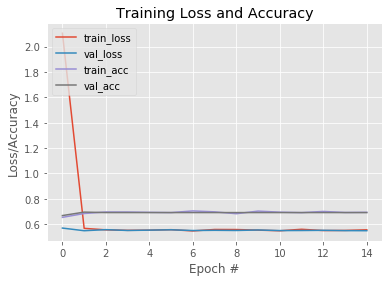

In [65]:
plt.style.use("ggplot")
plt.figure()
N = EPOCHS
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
# plt.savefig(args["plot"])

In [66]:
test_img = "./Training _ Validation Images/159-D.jpg"
image = cv2.imread(test_img)
image = cv2.resize(image, (IMAGE_DIMS[0], IMAGE_DIMS[1]))
image = image.astype("float") / 255.0
# image = img_to_array(image)
image = np.expand_dims(image, axis=0)

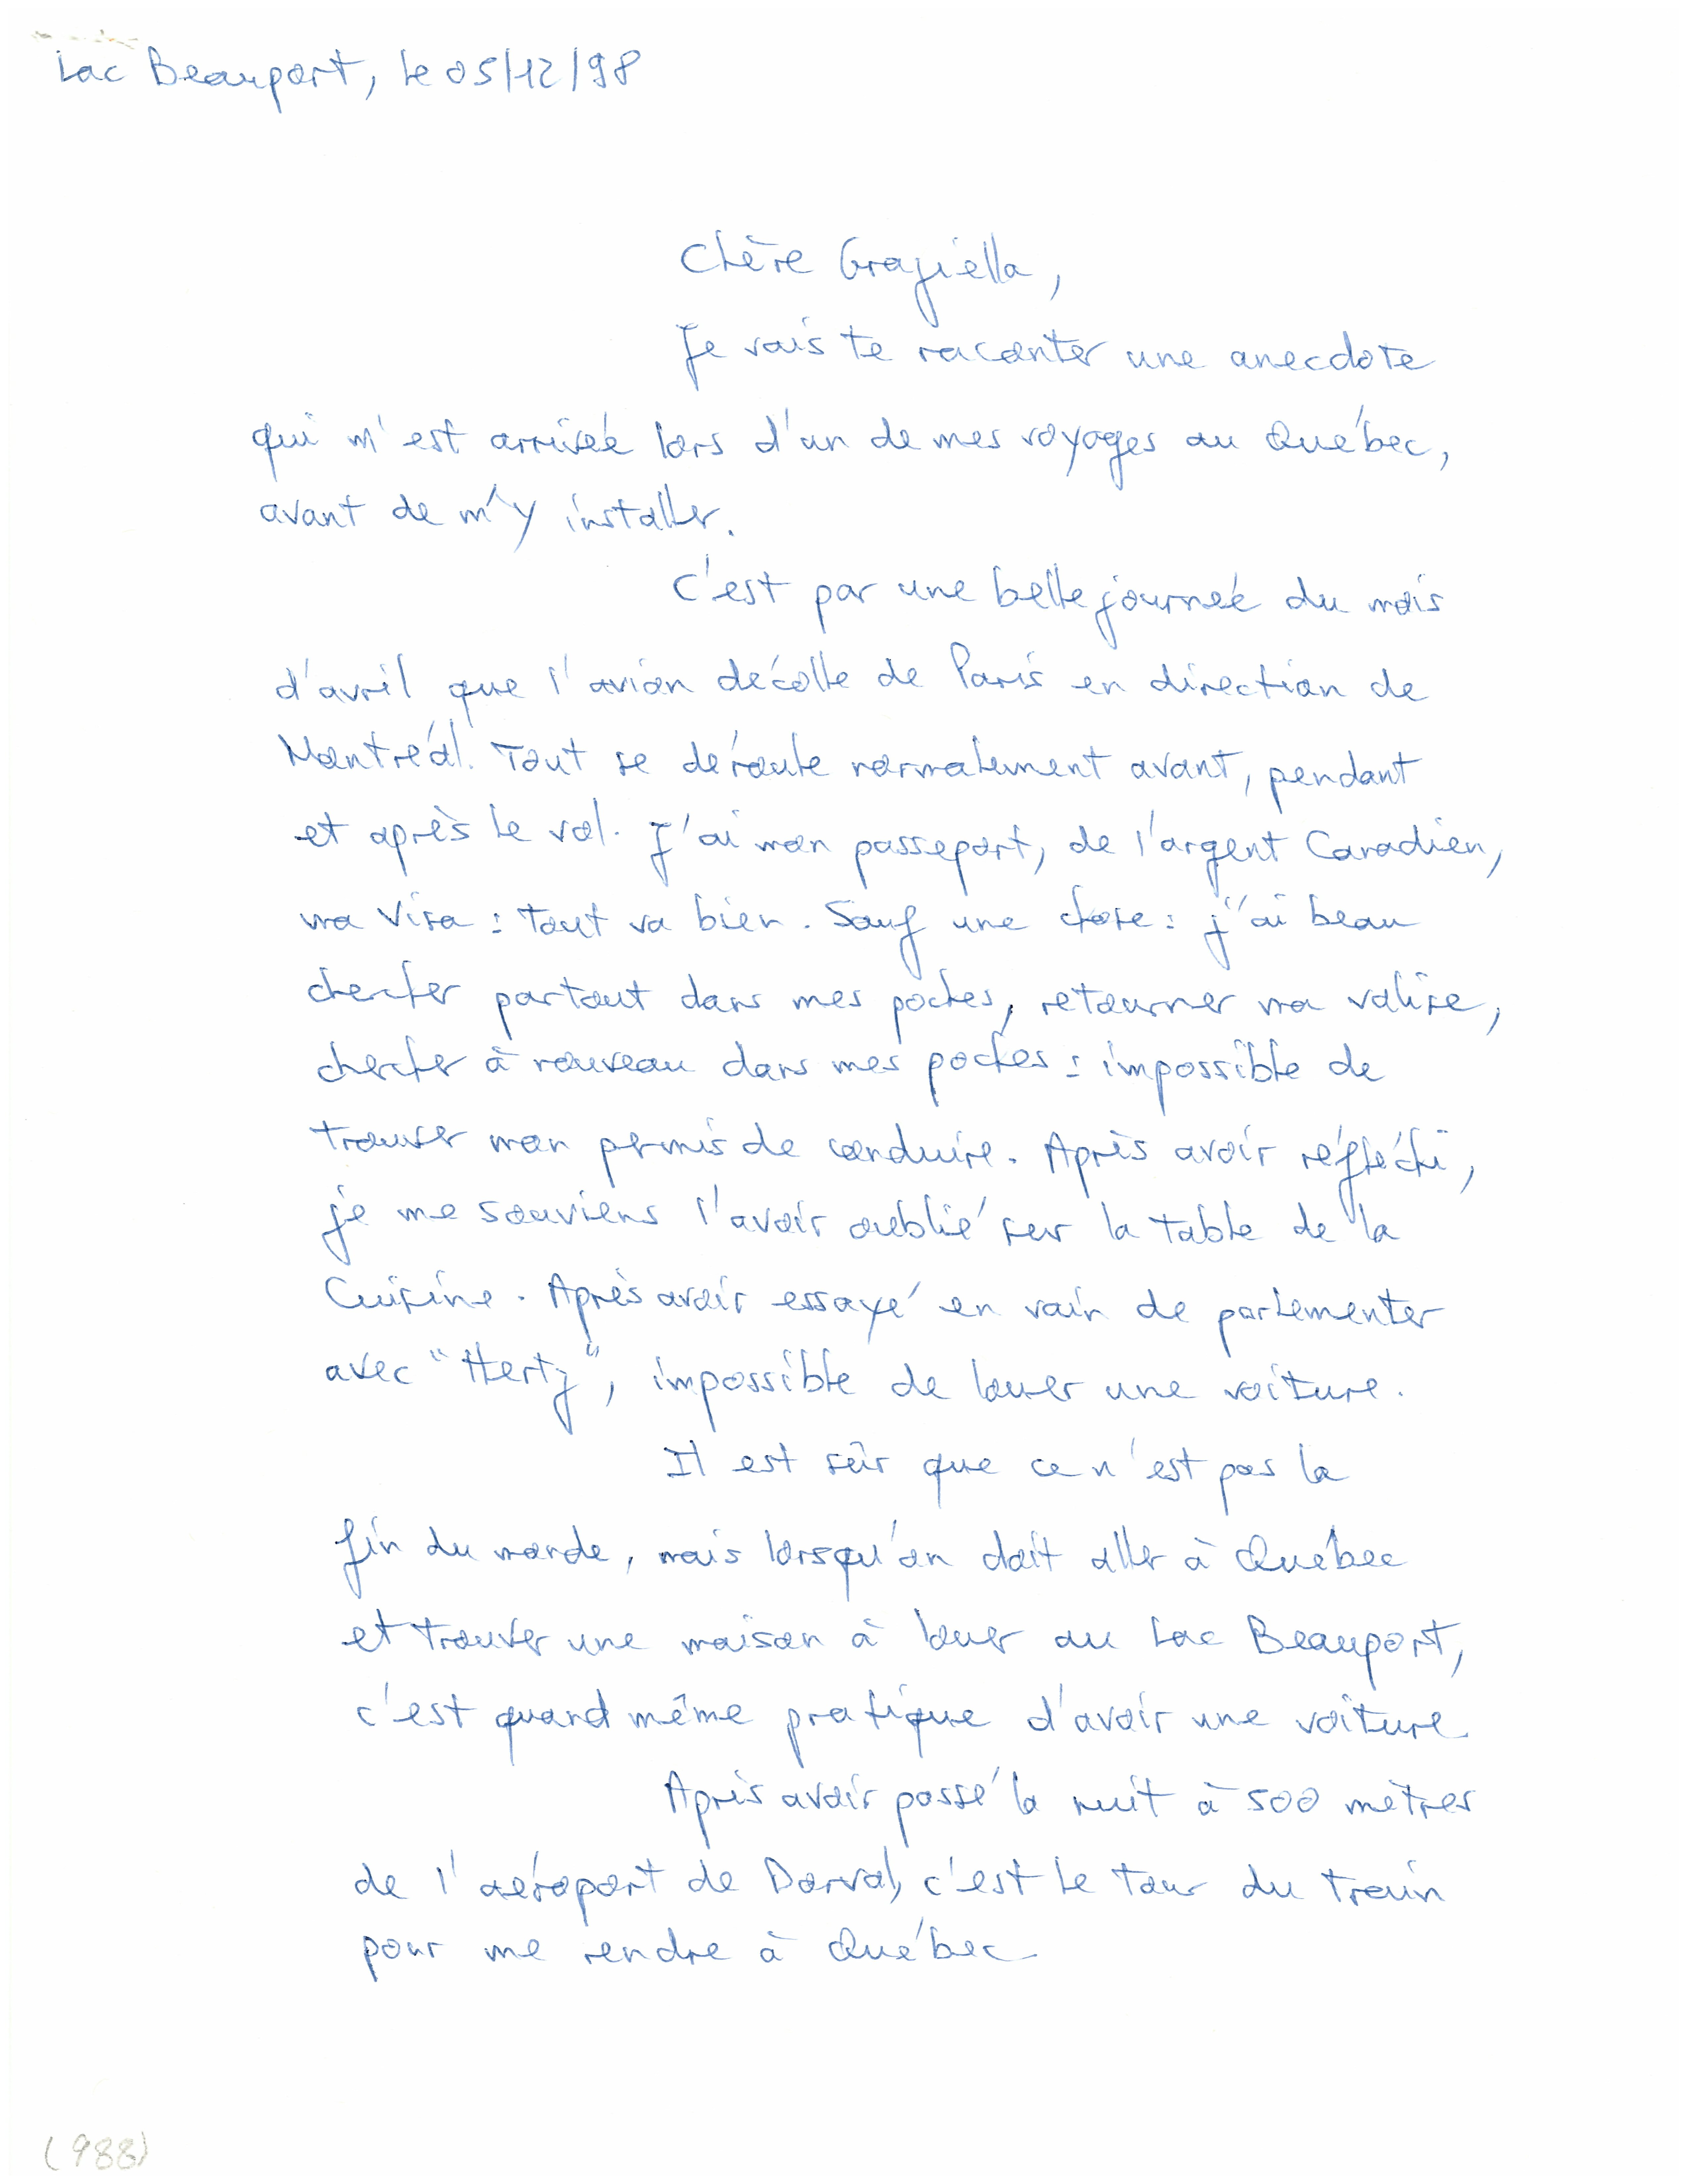

In [67]:
from IPython.display import Image
Image(test_img)

In [70]:
proba = model2.predict(image)[0]
for (label, p) in zip(mlb.classes_, proba):
    print("{}: {:.2f}%".format(label, p * 100))

C0: 5.30%
C1: 36.95%
C2: 58.03%
E0: 17.29%
E1: 36.38%
E2: 48.63%


In [71]:
model1_json = model1.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(model1_json)
# serialize weights to HDF5
model1.save_weights("model1.h5")

In [72]:
model2_json = model2.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model2_json)
# serialize weights to HDF5
model1.save_weights("model2.h5")